In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',  encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
# data cleaning
# EDA
# text preprocessing
# model building
# evaluation
# improvment
# website 
# deploy

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# 1. Data cleaning

In [6]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [7]:
df.sample(5)

,v1,v2
4257,ham,I am late. I will be there at
5361,ham,Yep get with the program. You're slacking.
201,ham,Hello darlin ive finished college now so txt m...
2596,ham,No i'm not gonna be able to. || too late notic...
1500,ham,Host-based IDPS for linux systems.


In [8]:
# renaming the column
df.rename(columns={'v1':'target','v2':'text'},inplace=True)


In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2. EDA

In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

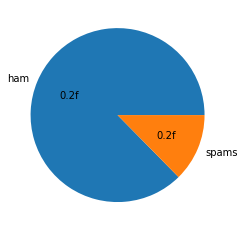

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spams'],autopct='0.2f')
plt.show()

In [20]:
# data is imbalanced # natural language tool kit(nltk)

In [21]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [22]:
import nltk  
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marzi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters']=df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# number of word
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
# for ham messages
df[df['target']==0][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
# for spams messages
df[df['target']==1][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [30]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

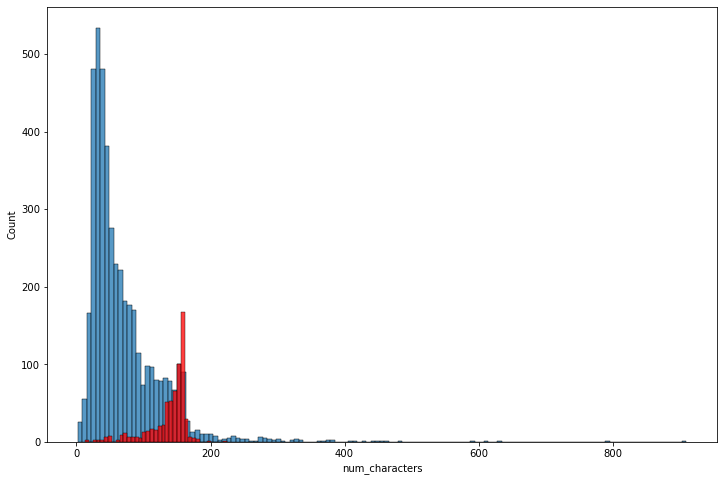

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

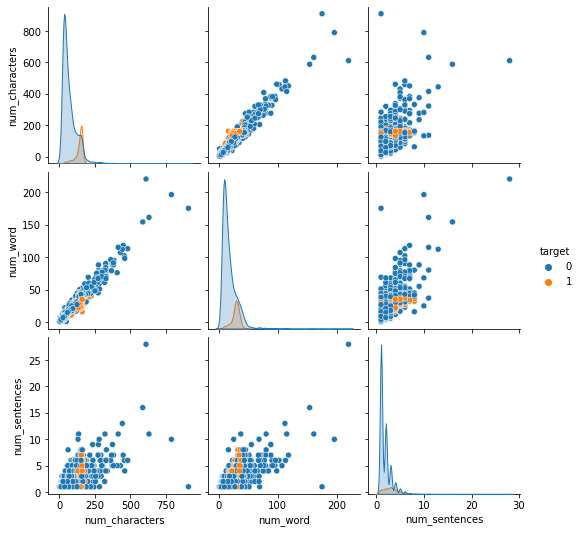

In [32]:
sns.pairplot(df,hue='target')

In [33]:
# correlation
df.corr()

,target,num_characters,num_word,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_word,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

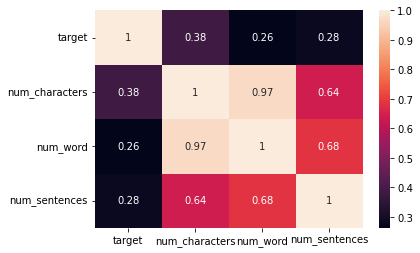

In [34]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing
* Lower case
* Tokenization
* Removing Special character
* Removing stopword and puntuation
* Stemming

### stopword 
 stopword: which doesn't hold much value in dataset


In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marzi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### punctuation 

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Stemming

In [39]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [40]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():  # removing special character
            y.append(i)
    text=y[:] # list must be split, not text=y
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))       
                            
    return " ".join(y)
transform_text('Hi! How %% Are YOU loving?')


'hi love'

In [41]:
df['transform_text']=df['text'].apply(transform_text)


In [ ]:
df.head()

# 4. wordCloud

In [ ]:
pip install wordcloud

In [42]:
from wordcloud import WordCloud
wc=WordCloud(width=50,height=50,min_font_size=10,background_color='white')

In [ ]:
# wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

## Top 30 word

### for Spam

In [43]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
len(spam_corpus) 

9939

C:\Users\marzi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


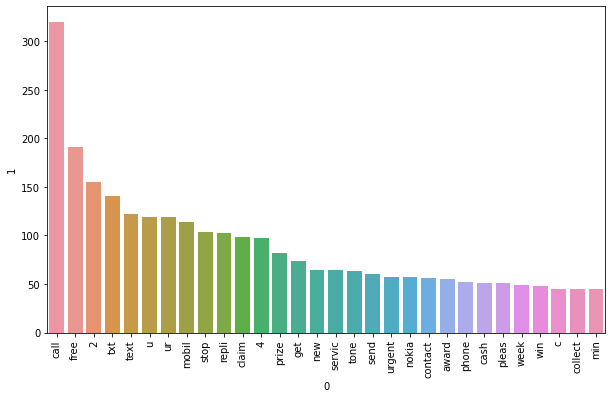

In [44]:
from collections import Counter
plt.figure(figsize=(10,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### For ham

In [45]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)        

35394

C:\Users\marzi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


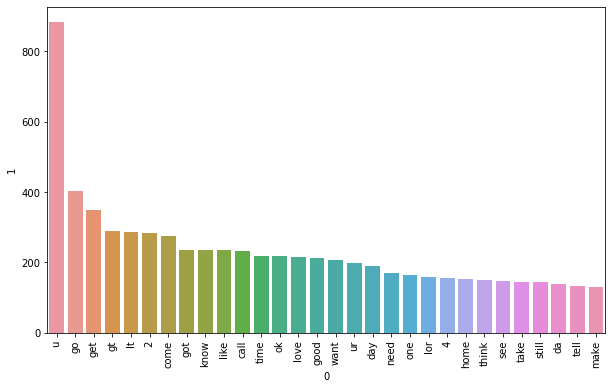

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [71]:
# vectorize
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf= TfidfVectorizer()
x=tfidf.fit_transform(df['transform_text']).toarray()
x.shape

(5169, 6708)

In [48]:
y=df['target'].values
print(y)


[0 0 1 ... 0 0 0]


In [ ]:
print(x)

In [49]:
# model selection
from sklearn.model_selection import train_test_split


In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [52]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [73]:
gnb.fit(x_train,y_train)
y_predict=gnb.predict(x_test)
print(accuracy_score(y_test,y_predict))
print(precision_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.8762088974854932
0.5231481481481481
[[793 103]
 [ 25 113]]


In [74]:
mnb.fit(x_train,y_train)
y_predict=mnb.predict(x_test)
print(accuracy_score(y_test,y_predict))
print(precision_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.9593810444874274
1.0
[[896   0]
 [ 42  96]]


In [75]:
bnb.fit(x_train,y_train)
y_predict=bnb.predict(x_test)
print(accuracy_score(y_test,y_predict))
print(precision_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


In [ ]:
pip install xgboost

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from xgboost import XGBClassifier

In [57]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [58]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [76]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [77]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [78]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print('for ',name)
    print('Accuracy- ',current_accuracy)
    print('Precision- ',current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  SVC
Accuracy-  0.9729206963249516
Precision-  0.9741379310344828
for  KN
Accuracy-  0.9003868471953579
Precision-  1.0
for  NB
Accuracy-  0.9593810444874274
Precision-  1.0
for  DT
Accuracy-  0.9361702127659575
Precision-  0.8461538461538461
for  LR
Accuracy-  0.9516441005802708
Precision-  0.94
for  RF
Accuracy-  0.9738878143133463
Precision-  1.0
for  AdaBoost
Accuracy-  0.9613152804642167
Precision-  0.9454545454545454
for  BgC
Accuracy-  0.9584139264990329
Precision-  0.8625954198473282
for  ETC
Accuracy-  0.9758220502901354
Precision-  0.9829059829059829
for  GBDT
Accuracy-  0.9526112185686654
Precision-  0.9238095238095239
for  xgb
Accuracy-  0.9729206963249516
Precision-  0.9365079365079365


In [79]:
performance_df=pd.DataFrame({
    'Algorithm':clfs.keys(),
    'Accuracy':accuracy_scores,
    'Precision':precision_scores
}).sort_values('Accuracy',ascending=False)

In [80]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.975822,0.982906
5,RF,0.973888,1.000000
0,SVC,0.972921,0.974138
10,xgb,0.972921,0.936508
6,AdaBoost,0.961315,0.945455
2,NB,0.959381,1.000000
7,BgC,0.958414,0.862595
9,GBDT,0.952611,0.923810
4,LR,0.951644,0.940000
3,DT,0.936170,0.846154


In [81]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')

In [82]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.975822
1,RF,Accuracy,0.973888
2,SVC,Accuracy,0.972921
3,xgb,Accuracy,0.972921
4,AdaBoost,Accuracy,0.961315
5,NB,Accuracy,0.959381
6,BgC,Accuracy,0.958414
7,GBDT,Accuracy,0.952611
8,LR,Accuracy,0.951644
9,DT,Accuracy,0.936170


<function matplotlib.pyplot.show(close=None, block=None)>

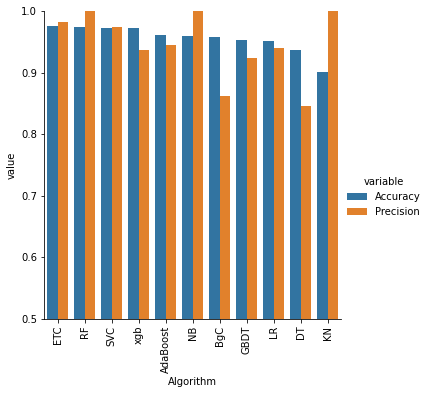

In [83]:
sns.catplot(x='Algorithm',y='value',
           hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show